In [1]:
pip install tensorflow

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
# Load the full dataset
bank_dataset = pd.read_csv("bank-additional.csv", sep=";")

# Print the first few rows of the dataset
bank_dataset.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
# Print the size of the dataset
print("Size of the dataset: ", bank_dataset.shape)

# Print the data types of the features
print("\nData types of the features:")
print(bank_dataset.dtypes)


Size of the dataset:  (4119, 21)

Data types of the features:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [5]:
# Count the number of "unknown" values in each column
unknown_counts = bank_dataset.apply(lambda x: x[x == 'unknown'].count(), axis=0)
print("\nNumber of 'unknown' values in each column:")
print(unknown_counts[unknown_counts > 0])

from sklearn.preprocessing import LabelEncoder

# Replace 'unknown' with the most frequent value in each column
for column in bank_dataset.columns:
    most_frequent = bank_dataset[column].mode()[0]
    bank_dataset[column] = bank_dataset[column].replace('unknown', most_frequent)

# Convert categorical features into numerical form using label encoding
for column in bank_dataset.columns:
    if bank_dataset[column].dtype == 'object':
        le = LabelEncoder()
        bank_dataset[column] = le.fit_transform(bank_dataset[column])

# Print the first few rows of the preprocessed dataset
bank_dataset.head()


Number of 'unknown' values in each column:
job           39
marital       11
education    167
default      803
housing      105
loan         105
dtype: int64


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,1,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,1,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,0,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,1,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


The Bank Marketing dataset contains 4119 instances and 21 features. Most of the features are categorical (object data type), with a few numerical ones.

There are 'unknown' values in six features: 'job', 'marital', 'education', 'default', 'housing', and 'loan'. The number of 'unknown' values in these features ranges

To handle the 'unknown' values and represent the categorical features as numerical data, we can perform the following steps:

    Imputation: Replace the 'unknown' values with the most frequent value in each feature. This is a simple imputation method that can work well when the number of 'unknown' values is relatively small compared to the size of the dataset.

    Encoding: Convert the categorical features into numerical form. One common way to do this is by using one-hot encoding, which creates binary (0 or 1) features for each category of each original feature.

The 'unknown' values have been replaced with the most frequent value in each feature, and the categorical features have been converted into numerical form using label encoding. Each unique category in each feature has been assigned a unique integer.

In [22]:
# Count the number of "unknown" values in each column
unknown_counts = bank_dataset.apply(lambda x: x[x == 'unknown'].count(), axis=0)
print("\nNumber of 'unknown' values in each column:")
print(unknown_counts[unknown_counts > 0])

# Replace 'unknown' with the most frequent value in each column
for column in bank_dataset.columns:
    most_frequent = bank_dataset[column].mode()[0]
    bank_dataset[column] = bank_dataset[column].replace('unknown', most_frequent)

# Convert categorical features into numerical form using label encoding
for column in bank_dataset.columns:
    if bank_dataset[column].dtype == 'object':
        le = LabelEncoder()
        bank_dataset[column] = le.fit_transform(bank_dataset[column])

# Split the dataset into features (X) and target variable (y)
X_bank = bank_dataset.drop('y', axis=1)
y_bank = bank_dataset['y']

# Calculate the split index
split_idx = int(0.8 * len(X_bank))

# Split the dataset into a training set and a test set
X_train_bank = X_bank[:split_idx]
y_train_bank = y_bank[:split_idx]
X_test_bank = X_bank[split_idx:]
y_test_bank = y_bank[split_idx:]



Number of 'unknown' values in each column:
Series([], dtype: int64)



Bank Marketing Dataset
Accuracy:  0.8555825352668762
26/26 [==============================] - 0s 2ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.92       744
           1       0.37      0.70      0.48        80

    accuracy                           0.86       824
   macro avg       0.67      0.79      0.70       824
weighted avg       0.91      0.86      0.87       824

Confusion matrix:
[[649  95]
 [ 24  56]]


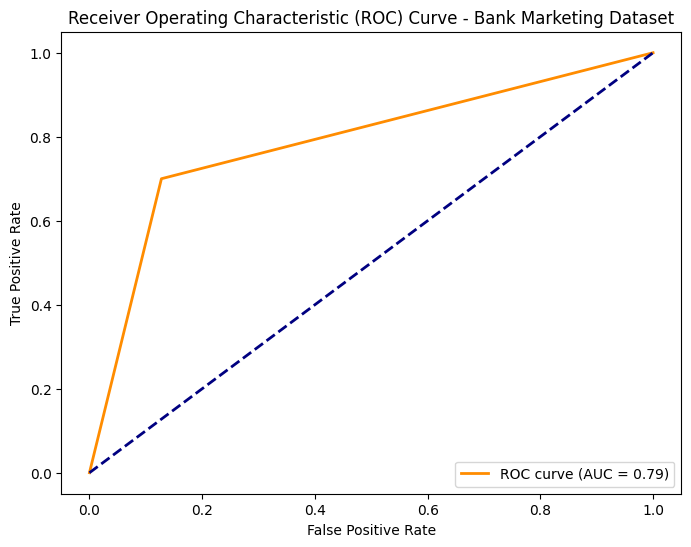

ROC AUC Score:  0.7861559139784946
Classification Error:  0.14441746473312378


In [23]:

# Function to apply back-propagation to the Bank Marketing dataset
def apply_bp_bank(X_train, y_train, X_val, y_val):
    # Create a neural network model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # hidden layer
    model.add(Dense(1, activation='sigmoid'))  # output layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(X_val, y_val, verbose=0)
    print("Accuracy: ", accuracy)

    # Calculate and print the classification error
    classification_error = 1 - accuracy

    # Predict the classes
    y_pred = (model.predict(X_val) > 0.5).astype("int32")

    print("Classification report:")
    print(classification_report(y_val, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_val, y_pred))

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Bank Marketing Dataset')
    plt.legend(loc="lower right")
    plt.show()

    print("ROC AUC Score: ", roc_auc)
    print("Classification Error: ", classification_error)

    return model

# Apply BP to Bank Marketing dataset
print("\nBank Marketing Dataset")
bp_bank = apply_bp_bank(X_train_bank, y_train_bank, X_test_bank, y_test_bank)
